In [1]:
# IMPORTING IMPORTANT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import os ,sys
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import train_test_split
import scipy


In [2]:
# IMPORTING THE DATASET

In [3]:
data=pd.read_csv('Data.csv')

In [4]:
data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


# EDA

In [5]:
#CHECK DATAFRAME STRUCTURE LIKE COLUMNS AND ITS DATATYPES
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [6]:
# CHECK THE NUM OF ROWS ND COLUMNS
data.shape

(25000, 24)

In [7]:
data.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [8]:
data['flood_impacted'].unique()

array([0, 1], dtype=int64)

OBSERVATION: here it can be seen that 0 refers to flood impacted and 1 refers to not flood impacted. 
as it is 0 and 1 it comes under categorical feature.

In [9]:
data['flood_proof'].unique()

array([1, 0], dtype=int64)

OBSERVATION: here it can be seen that 1 refers to flood proof and 0 refers to not flood proof

<AxesSubplot:xlabel='Location_type', ylabel='count'>

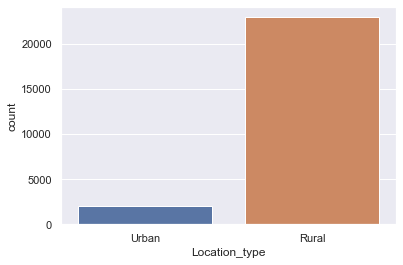

In [10]:
sns.countplot(data=data, x="Location_type")
# OBSERVATION: THERE ARE MORE NO OF WAREHOUSE IN RURAL THAN URBAN.

<AxesSubplot:xlabel='WH_capacity_size', ylabel='count'>

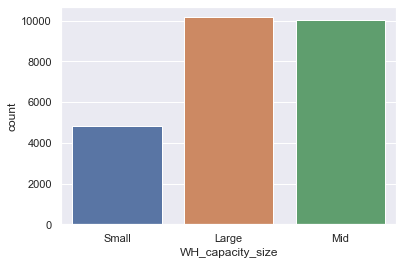

In [11]:
sns.countplot(data=data, x="WH_capacity_size")
#OBSERVATION: THERE ARE LARGE CAPACITY WAREHOUSE MORE THAN SMALL.

<AxesSubplot:xlabel='zone', ylabel='count'>

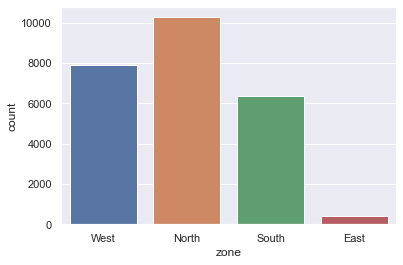

In [12]:
sns.countplot(data=data, x="zone")
#OBSERVATION: THERE ARE VERY LESS NUM OF WAREHOUSE IN EAST REGION AND MAJOR IS IN NORTH ZONE.

<AxesSubplot:xlabel='Location_type', ylabel='wh_breakdown_l3m'>

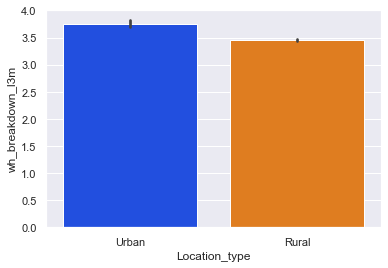

In [13]:
sns.barplot(data=data, x='Location_type', y='wh_breakdown_l3m',palette='bright')
#OBSERVATION: MORE NUM OF BREAKDOWN REPORTED IN URBAN WAREHOUSE.

<AxesSubplot:xlabel='transport_issue_l1y', ylabel='product_wg_ton'>

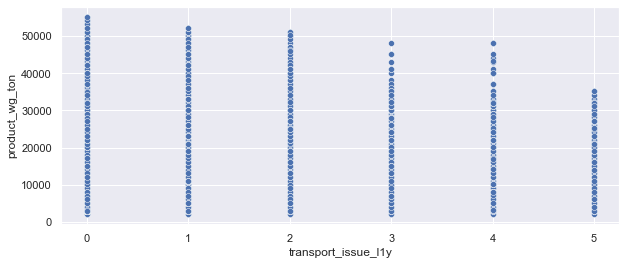

In [14]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='transport_issue_l1y', y='product_wg_ton', data=data)

#OBSERVATION: AS IT CAN BE SEEN WHERE THERE IS LESS TRANSPORT ISSUE PRODUCT SHIPPED IS MORE.

<AxesSubplot:xlabel='zone', ylabel='retail_shop_num'>

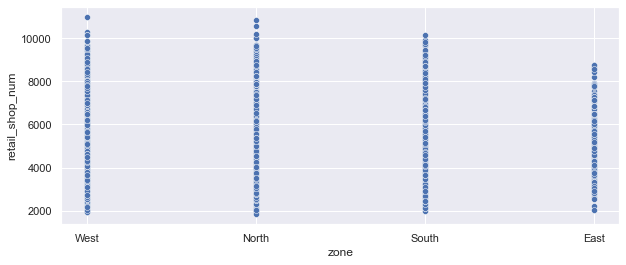

In [15]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=data, x="zone", y="retail_shop_num")

#OBSERVATION: as it can be seen the most retail shop that sell the products are from north zone while the least is east zone.

<AxesSubplot:xlabel='zone', ylabel='workers_num'>

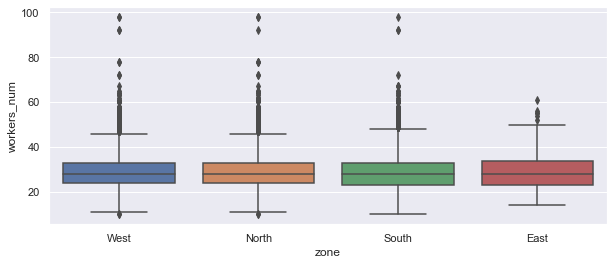

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(data=data,x="zone", y="workers_num")
#observation: It can be seen there is more workers in west, north and south in comaprison to east zone.

<AxesSubplot:xlabel='zone', ylabel='product_wg_ton'>

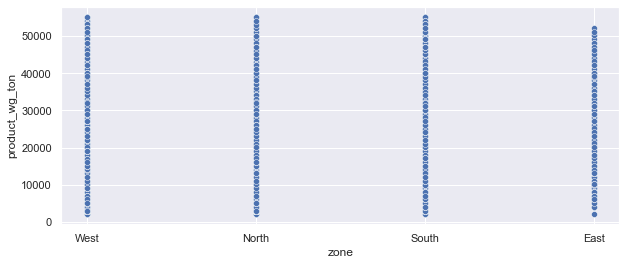

In [17]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=data,x="zone", y="product_wg_ton", palette= 'rocket')


# FEATURE ENGINEERING

In [18]:
data1= data.copy()

In [19]:
# we will drop the features that are not of our use.

data1.drop(['WH_Manager_ID','Ware_house_ID'],axis=1,inplace=True)

In [20]:
data1.head(2)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074


In [21]:
# HANDLING THE MISSING VALUES

for columns in data1.columns:
    print(columns,'has',data1[columns].isnull().sum()/len(data1)*100,'Missing Values')

Location_type has 0.0 Missing Values
WH_capacity_size has 0.0 Missing Values
zone has 0.0 Missing Values
WH_regional_zone has 0.0 Missing Values
num_refill_req_l3m has 0.0 Missing Values
transport_issue_l1y has 0.0 Missing Values
Competitor_in_mkt has 0.0 Missing Values
retail_shop_num has 0.0 Missing Values
wh_owner_type has 0.0 Missing Values
distributor_num has 0.0 Missing Values
flood_impacted has 0.0 Missing Values
flood_proof has 0.0 Missing Values
electric_supply has 0.0 Missing Values
dist_from_hub has 0.0 Missing Values
workers_num has 3.9600000000000004 Missing Values
wh_est_year has 47.524 Missing Values
storage_issue_reported_l3m has 0.0 Missing Values
temp_reg_mach has 0.0 Missing Values
approved_wh_govt_certificate has 3.6319999999999997 Missing Values
wh_breakdown_l3m has 0.0 Missing Values
govt_check_l3m has 0.0 Missing Values
product_wg_ton has 0.0 Missing Values


In [22]:
# IMPUTING THE MISSING VALUES 

data1['approved_wh_govt_certificate']= data1['approved_wh_govt_certificate'].fillna(data1['approved_wh_govt_certificate'].mode()[0])

In [23]:
data1['workers_num']=data1['workers_num'].fillna(data1['workers_num'].median())

In [24]:
data1= data1.drop(['wh_est_year'],axis=1)

In [25]:
# CHECK FOR MISSING VALUES AFTER IMPUTATION
data1.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [26]:
# HANDLING THE CATEGORICAL FEATURES


In [27]:
data2=pd.get_dummies(data1,columns=['Location_type','WH_capacity_size','zone','WH_regional_zone','approved_wh_govt_certificate','wh_owner_type'],drop_first=True)

In [28]:
data2

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,wh_owner_type_Rented
0,3,1,2,4651,24,0,1,1,91,29.0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,4,6217,47,0,0,1,210,31.0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,...,1,0,0,0,0,0,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,...,0,1,0,0,0,1,0,0,0,1
4,3,1,2,4740,42,1,0,1,112,25.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3,0,4,5390,19,0,0,1,142,34.0,...,0,0,0,0,0,0,0,0,0,1
24996,6,0,4,4490,57,0,0,1,130,28.0,...,1,0,0,0,0,0,1,0,0,0
24997,7,0,2,5403,31,1,0,1,147,28.0,...,0,0,0,1,0,0,0,1,0,1
24998,1,0,2,10562,25,0,0,1,60,25.0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# concat the data2 with original data

data1=pd.concat([data1,data2],axis=1)

In [30]:
# dropping the columns which are converted to categorical features.

data1=data1.drop(['Location_type','WH_capacity_size','zone','WH_regional_zone','approved_wh_govt_certificate','wh_owner_type'],axis=1)

In [31]:
data1

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,wh_owner_type_Rented
0,3,1,2,4651,24,0,1,1,91,29.0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,4,6217,47,0,0,1,210,31.0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,...,1,0,0,0,0,0,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,...,0,1,0,0,0,1,0,0,0,1
4,3,1,2,4740,42,1,0,1,112,25.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3,0,4,5390,19,0,0,1,142,34.0,...,0,0,0,0,0,0,0,0,0,1
24996,6,0,4,4490,57,0,0,1,130,28.0,...,1,0,0,0,0,0,1,0,0,0
24997,7,0,2,5403,31,1,0,1,147,28.0,...,0,0,0,1,0,0,0,1,0,1
24998,1,0,2,10562,25,0,0,1,60,25.0,...,0,0,0,0,0,0,0,0,0,1


# SPLIT THE DATASET INTO TRAINING AND TEST SET

In [32]:
# SPLIT THE DATASET INTO FEATURES AND LABEL
x= data1.drop(['product_wg_ton'],axis=1)
y=data1['product_wg_ton']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=125)


In [35]:
len(X_train)

20000

In [36]:
len(X_test)

5000

## FEATURE SCALING

In [37]:
#from sklearn.preprocessing import StandardScaler

In [37]:
#scaler=StandardScaler()
#x_train1=scaler.fit_transform(X_train)
#x_test1=scaler.fit_transform(X_test)

# MODEL BUILDING

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score , mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

## LINEAR REGRESSION

In [39]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred_lr= lr.predict(X_train)
print("R2_score",r2_score(y_train,y_pred_lr))
print("***************************************")
print("MAE",mean_absolute_error(y_train,y_pred_lr))

R2_score 0.9855607770942411
***************************************
MAE 1010.8096765122227


In [41]:
y_pred_lr= lr.predict(X_test)
print("R2_score",r2_score(y_test,y_pred_lr))
print("***************************************")
print("MAE",mean_absolute_error(y_test,y_pred_lr))

R2_score 0.9859916060081497
***************************************
MAE 1011.2430145840647


## RANDOM FOREST

In [41]:
# RANDOM FOREST
rf=RandomForestRegressor()
rf.fit(x_train1,y_train)
y_pred_rf= rf.predict(x_test1)
print("R2_score",r2_score(y_test,y_pred_rf))
print("***************************************")
print("MAE",mean_absolute_error(y_test,y_pred_rf))


R2_score 0.9932581204346576
***************************************
MAE 703.3696259999994
